# Visualize Networks

In [3]:
# Mathematical and Data Managment
import numpy as np
import pandas as pd
import scipy.sparse as sp

# Graph Managment
import graph_tool.all as gt
import networkx as nx
#from utils.Functions import *
#from utils.Segregation import *

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from forceatlas2 import forceatlas2_networkx_layout

# Miscellaneous
import pickle
from glob import glob
from tqdm import tqdm
import random

/mnt/disk2/anaconda3/envs/gt_global/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:1544: RuntimeWarning: Error importing Gtk module: ; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [10]:
# Load the graph
g = gt.load_graph("/mnt/disk2/Data/3_Day_Graphs/2021-05-16.graphml")

{'Ending date': <EdgePropertyMap object with value type 'string', for Graph 0x7f099c7a0490, at 0x7f099c76d3d0>, 'Normal Weights': <EdgePropertyMap object with value type 'double', for Graph 0x7f099c7a0490, at 0x7f099c76c950>, 'Number of rts': <EdgePropertyMap object with value type 'int32_t', for Graph 0x7f099c7a0490, at 0x7f099c76c110>, 'Total of rts': <EdgePropertyMap object with value type 'int32_t', for Graph 0x7f099c7a0490, at 0x7f099c76d110>}

In [7]:
#pos_fruchterman_reingold Layout
pos_fruchterman_reingold = gt.fruchterman_reingold_layout(g, weight=g.ep['Normal Weights'])
#pos_sfdp = gtd.sfdp_layout(g)

In [15]:
with open("/mnt/disk2/Data/Pickle/pos_fruchterman_reingold.pkl", "wb") as f:
    pickle.dump(pos_fruchterman_reingold, f)

In [ ]:
# Assign colors based on 'Political Affiliation'
color_dict = {
    'No Retweets': [0.5, 0.5, 0.5, 1],        # Gray for 'No Retweets'
    'Retweets Centro': [0, 1, 0, 1],          # Green for 'Retweets Centro'
    'Retweets Derecha': [1, 0, 0, 1],         # Red for 'Retweets Derecha'
    'Retweets Izquierda': [0, 0, 1, 1],       # Blue for 'Retweets Izquierda'
}

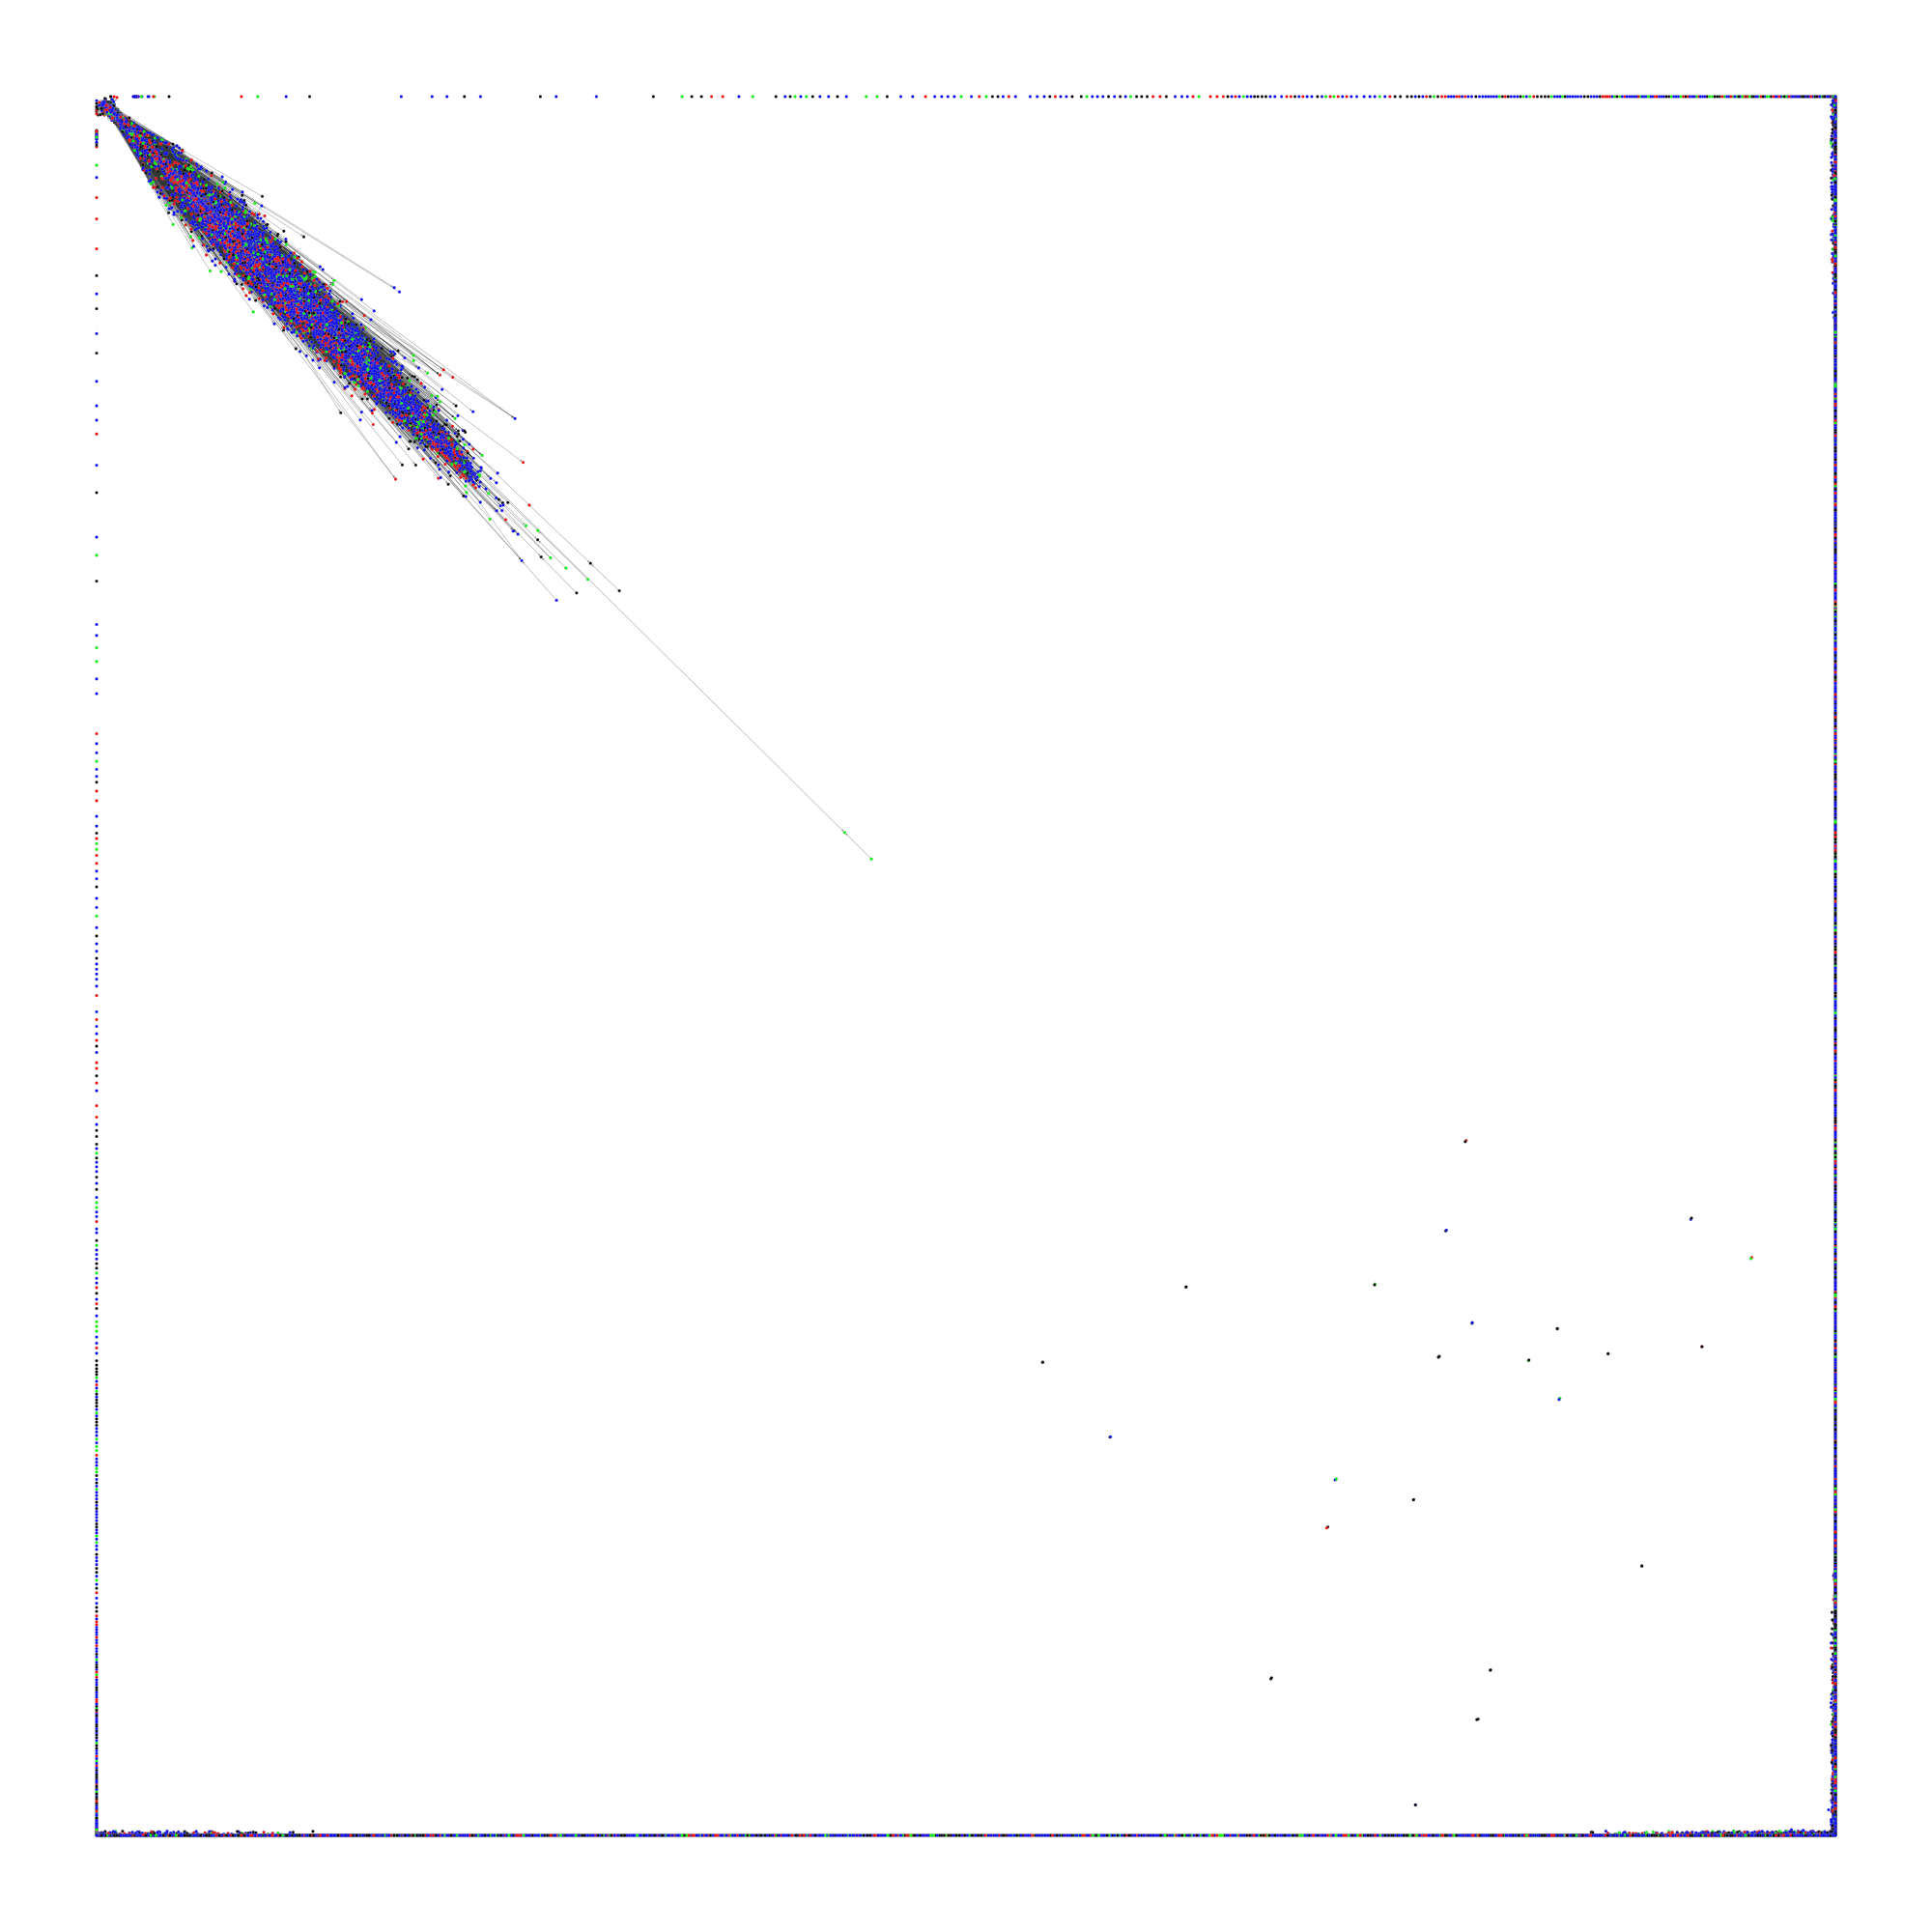

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2c94af7050, at 0x7f2c90bfe690>

In [9]:
# Draw the graph
gt.graph_draw(g, pos_fruchterman_reingold, vertex_fill_color = g.vp['Color'], output_size = (1000, 1000))

In [5]:
def fraction_graph(g,percentage, seed=437):
    random.seed(seed)
    # Get the total number of vertices and edges
    edge_list = list(g.iter_edges())
    vertex_list = list(g.iter_vertices())

    # Calculate the number of vertices and edges for the subgraph
    num_subgraph_vertices = int(len(vertex_list) * (percentage / 100))
    num_subgraph_edges = int(len(edge_list) * (percentage / 100))

    # Get random indices for vertices and edges
    selected_vertices = random.sample(vertex_list, num_subgraph_vertices)

    # Filter edges connected to nodes labeled type
    filtered_edges = g.new_edge_property("bool")
    filtered_edges.a = False

    # Filter nodes with label type
    filtered_nodes = g.new_vertex_property("bool")
    filtered_nodes.a = False
            
    for v in g.iter_vertices():
        if v in selected_vertices:
            vertex = g.vertex(v)
            filtered_nodes[vertex] = True
            for e in vertex.all_edges():
                edge_tuple = [int(e.source()), int(e.target())]
                if edge_tuple in edge_list:
                    filtered_edges[e] = True

    subgraph = gt.GraphView(g,vfilt=filtered_nodes, efilt=filtered_edges)
    return subgraph

In [6]:
def to_networkx(g: gt.Graph) -> nx.Graph:
    
    if g.is_directed():
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()

    # Add nodes with their properties to the NetworkX graph
    for v in g.vertices():
        node_properties = {prop_name: g.vp[prop_name][v] for prop_name in g.vp}
        nx_graph.add_node(int(v), **node_properties)

    # Add edges with their properties to the NetworkX graph
    for e in g.edges():
        edge_properties = {prop_name: g.ep[prop_name][e] for prop_name in g.ep}
        nx_graph.add_edge(int(e.source()), int(e.target()), **edge_properties)
    
    return nx_graph

<GraphView object, directed, with 18482 vertices and 114409 edges, 4 internal vertex properties, 4 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7efc7352ec10, at 0x7efc78fa6d50>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7efc7352ec10, at 0x7efc73458350>, False), at 0x7efc7352ec10>


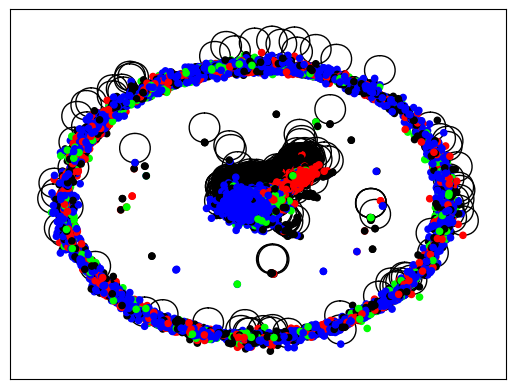

In [7]:
# Get subgraph
subgraph = fraction_graph(g,50, seed=2)
print(subgraph)

# Convert it to Network X
g_nx = to_networkx(subgraph)
colors = [node[1]['Color'] for node in g_nx.nodes(data=True)]
undirected_G = g_nx.to_undirected()

# Add colors
colors = [node[1]['Color'] for node in undirected_G.nodes(data=True)]

# Generate random positions for the nodes
pos = {i: (random.random(), random.random()) for i in undirected_G.nodes()}

# Optionally specify positions as a dictionary
# You can customize the positions or use other layout algorithms if needed

# Apply ForceAtlas2 layout algorithm
l = forceatlas2_networkx_layout(undirected_G, pos, niter=50)

# Draw the network using matplotlib
nx.draw_networkx(undirected_G, l, node_color=colors, node_size = 20, with_labels=False)

# Display the plot
plt.show()

In [ ]:
# Commit de prueba

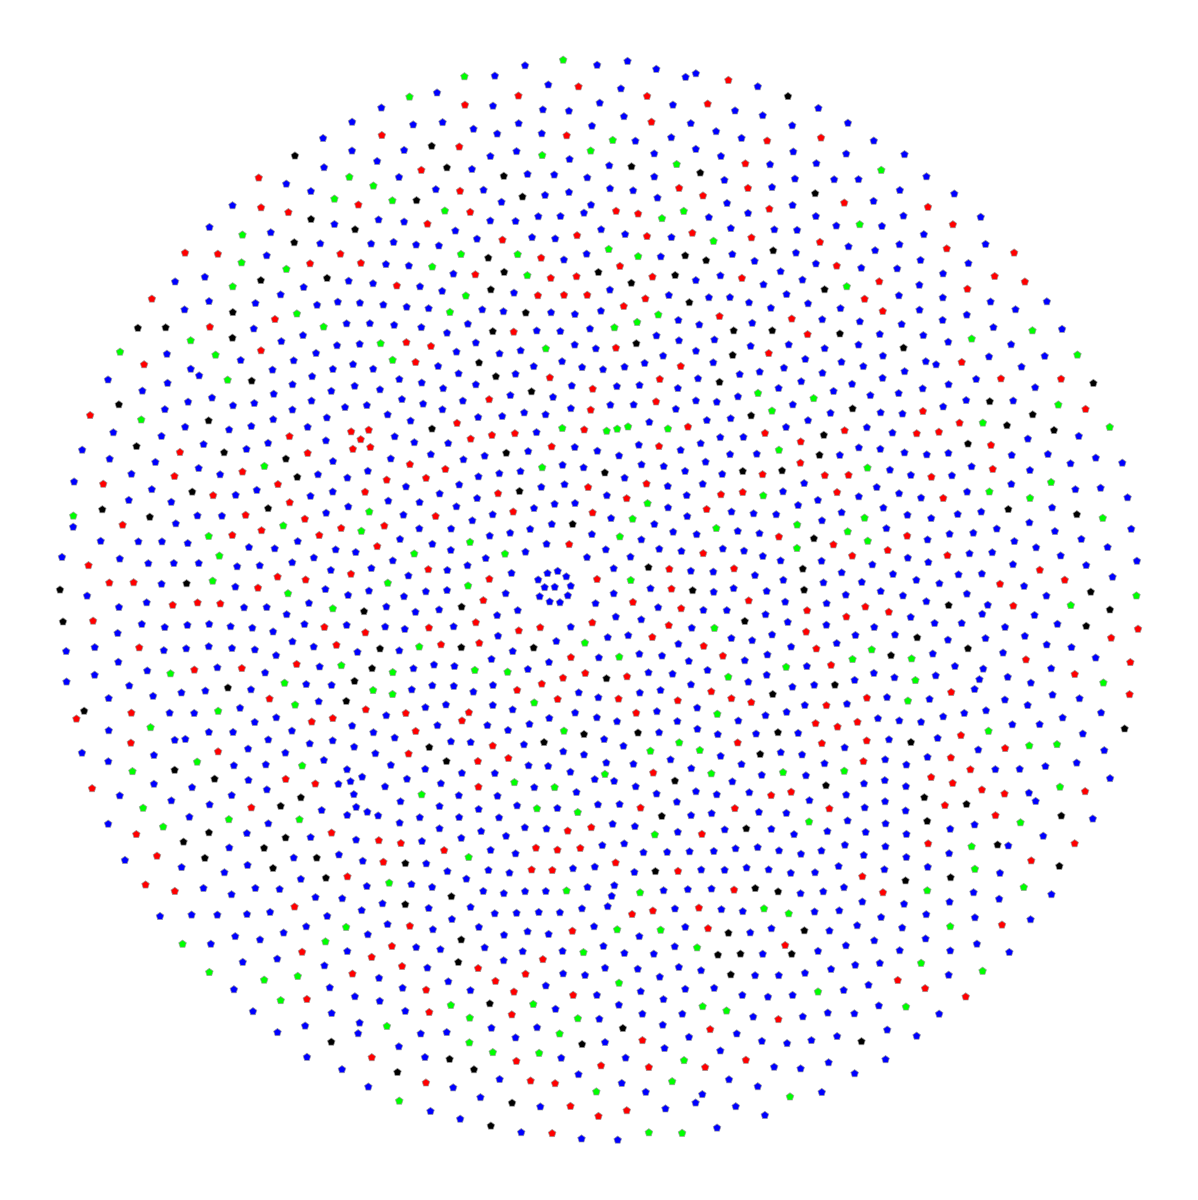

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f4b3ed65790, at 0x7f4b5c01ab50>

In [26]:
# Create a graph layout and drawing
pos = gt.sfdp_layout(subgraph)

gt.graph_draw(subgraph,
              pos=pos,
              #output_size=(200, 200),
              vertex_fill_color=subgraph.vp['Color'], # Uncomment to show Vertex colors
              #vertex_text=vertex_label_map,        # Uncomment to show vertex labels
              vertex_shape = 'pentagon',
              edge_color = 'white')